In [5]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    if orient == 'x':
        grad = np.absolute(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    elif orient == 'y':
        grad = np.absolute(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # Apply threshold
    else:
        raise NameError

    grad = ((grad / np.max(grad)) * 255).astype(np.uint8)

    grad_binary = np.zeros_like(grad)
    grad_binary[(grad > thresh[0]) * (grad < thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    mag = np.sqrt(grad_x ** 2 + grad_y ** 2)
    # Apply threshold
    mag = ((mag / np.max(mag)) * 255).astype(np.uint8)
    mag_binary = np.zeros_like(mag)
    mag_binary[(mag > mag_thresh[0]) * (mag < mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    direction = np.arctan2(np.absolute(grad_y), np.absolute((grad_x)))
    dir_binary = np.zeros_like(direction, dtype=np.uint8)
    # Apply threshold
    dir_binary[(direction > thresh[0]) * (direction < thresh[1])] = 1
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

image = mpimg.imread('./signs_vehicles_xygrad.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize * 5, thresh=(0.7, 1.3))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

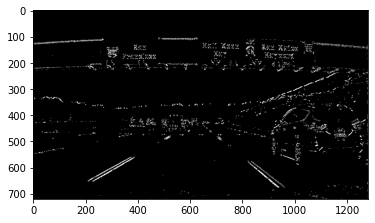

In [6]:
plt.imshow(combined, cmap='gray')